# Miniproject 2
# Philip Carr, Bradley Justice, Thomas Leing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(filename, skiprows=1, delimiter=","):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=skiprows, delimiter=delimiter)

In [3]:
def load_movies_data():
    """
    Load the movies.txt file.
    """
    genre_index_start = -19
    movies_data = {}
    movies_file = open("data/movies.txt", "r")
    lines = movies_file.readlines()
    for i in range(len(lines)):
        line = lines[i].split()
        length = len(line)
        movies_data[int(line[0])] = \
            [" ".join(line[1:length + genre_index_start - 1])] \
            + list(map(int, line[genre_index_start:]))
    return movies_data

In [4]:
data = load_data("data/data.txt", skiprows=0, delimiter="\t")
train_data = load_data("data/train.txt", skiprows=0, delimiter="\t")
test_data = load_data("data/test.txt", skiprows=0, delimiter="\t")
movies_data = load_movies_data()

## Removing Movies With Fewer Than 2 Ratings From Data

In [5]:
last_movie_id = max(movies_data)
movie_num_rated_array = np.zeros(last_movie_id+1)

for i in range(len(data)):
    movie_num_rated_array[int(data[i,1])] += 1

In [6]:
movies_to_keep = np.where(movie_num_rated_array > 1)[0]

In [7]:
len(movies_to_keep)

1541

In [8]:
movie_id_map = {}
displacement = 0
exclude_id = -1
for movie_id in movies_data:
    if movie_id in movies_to_keep:
        movie_id_map[movie_id] = movie_id - displacement
    else:
        movie_id_map[movie_id] = exclude_id
        displacement += 1

In [9]:
for i in movie_id_map:
    if movie_id_map[i] != i:
        if movie_id_map[i] != exclude_id:
            movies_data[movie_id_map[i]] = movies_data[i]
        del movies_data[i]

In [10]:
new_data = []
for i in range(len(data)):
    movie_id = data[i,1]
    new_movie_id = movie_id_map[movie_id]
    if new_movie_id != exclude_id:
        new_data.append([data[i,0], new_movie_id, data[i,2]])
new_data = np.array(new_data)

new_train_data = []
for i in range(len(train_data)):
    movie_id = train_data[i,1]
    new_movie_id = movie_id_map[movie_id]
    if new_movie_id != exclude_id:
        new_train_data.append([train_data[i,0], new_movie_id,
                               train_data[i,2]])
new_train_data = np.array(new_train_data)

new_test_data = []
for i in range(len(test_data)):
    movie_id = test_data[i,1]
    new_movie_id = movie_id_map[movie_id]
    if new_movie_id != exclude_id:
        new_test_data.append([test_data[i,0], new_movie_id,
                              test_data[i,2]])
new_test_data = np.array(new_test_data)

In [11]:
data = new_data
train_data = new_train_data
test_data = new_test_data

## Basic Visualizations

### 1. All ratings in the MovieLens Dataset

In [12]:
all_ratings = data[:,2]

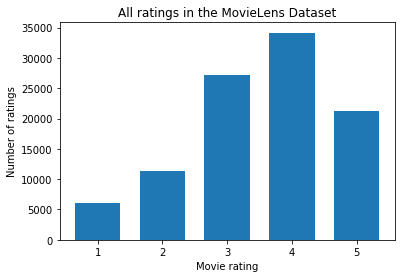

In [13]:
plt.figure()
plt.title("All ratings in the MovieLens Dataset")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(all_ratings, bins=np.arange(1,7), align="left", rwidth=0.7)
plt.show()

### 2. All ratings of the ten most popular movies (movies which have received the most ratings).

In [14]:
movie_ratings_dict = {}
for i in range(len(data)):
    movie_id = data[i,1]
    rating = data[i,2]
    if movie_id in movie_ratings_dict:
        movie_ratings_dict[movie_id][0] += 1
        movie_ratings_dict[movie_id][1].append(rating)
        movie_ratings_dict[movie_id][2] = \
            np.mean(np.array(movie_ratings_dict[movie_id][1]))
    else:
        movie_ratings_dict[movie_id] = [1, [rating], rating]

In [15]:
movie_popularities = []
for i in movie_ratings_dict:
    movie_popularities.append((movie_ratings_dict[i][0], i))
movie_popularities.sort()
movie_popularities.reverse()

In [16]:
top_10_most_popular_movies = movie_popularities[:10]
for i in range(len(top_10_most_popular_movies)):
    top_10_most_popular_movies[i] = top_10_most_popular_movies[i][1]

In [17]:
top_10_most_popular_movies_ratings = []
for i in top_10_most_popular_movies:
    top_10_most_popular_movies_ratings.extend(
        movie_ratings_dict[i][1])

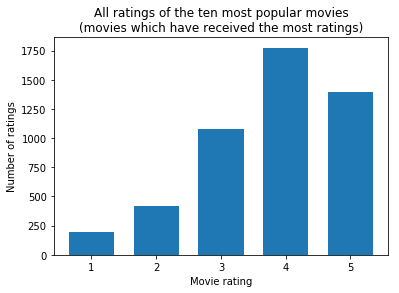

In [18]:
plt.figure()
plt.title("All ratings of the ten most " +
          "popular movies\n(movies which " +
          "have received the most ratings)")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(top_10_most_popular_movies_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()

### 3. All ratings of the ten best movies (movies with the highest average ratings).

In [19]:
movie_average_ratings = []
for i in movie_ratings_dict:
    movie_average_ratings.append((movie_ratings_dict[i][2], i))
movie_average_ratings.sort()
movie_average_ratings.reverse()

In [20]:
top_10_best_movies = movie_average_ratings[:10]
for i in range(len(top_10_best_movies)):
    top_10_best_movies[i] = top_10_best_movies[i][1]

In [21]:
top_10_best_movies_ratings = []
for i in top_10_best_movies:
    top_10_best_movies_ratings.extend(
        movie_ratings_dict[i][1])

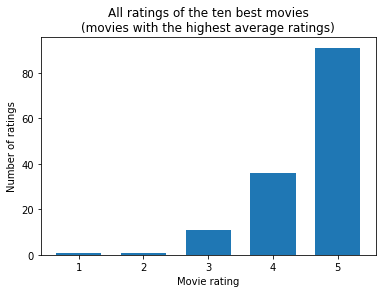

In [22]:
plt.figure()
plt.title("All ratings of the ten best movies\n" +
          "(movies with the highest average " +
          "ratings)")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(top_10_best_movies_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()

### 4. All ratings of movies from three genres of your choice (create three separate visualizations).

In [23]:
genres_dict = {
    "Unknown" : 0,
    "Action" : 1,
    "Adventure" : 2,
    "Animation" : 3,
    "Children’s" : 4,
    "Comedy" : 5,
    "Crime" : 6,
    "Documentary" : 7,
    "Drama" : 8,
    "Fantasy" : 9,
    "Film-Noir" : 10,
    "Horror" : 11,
    "Musical" : 12,
    "Mystery" : 13,
    "Romance" : 14,
    "Sci-Fi" : 15,
    "Thriller" : 16,
    "War" : 17,
    "Western" : 18,
}

In [24]:
action_movies = []
adventure_movies = []
animation_movies = []
for i in movies_data:
    if movies_data[i][1+genres_dict["Action"]] == 1:
        action_movies.append(i)
    elif movies_data[i][1+genres_dict["Adventure"]] == 1:
        adventure_movies.append(i)
    elif movies_data[i][1+genres_dict["Animation"]] == 1:
        animation_movies.append(i)

In [25]:
action_movie_ratings = []
adventure_movie_ratings = []
animation_movie_ratings = []
for i in range(len(action_movies)):
    action_movie_ratings.extend(
        movie_ratings_dict[action_movies[i]][1])
for i in range(len(adventure_movies)):
    adventure_movie_ratings.extend(
        movie_ratings_dict[adventure_movies[i]][1])
for i in range(len(animation_movies)):
    animation_movie_ratings.extend(
        movie_ratings_dict[animation_movies[i]][1])

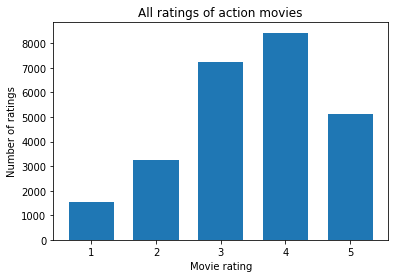

In [26]:
plt.figure()
plt.title("All ratings of action movies")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(action_movie_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()

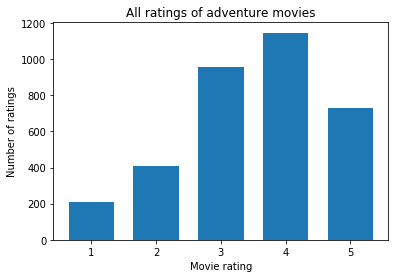

In [27]:
plt.figure()
plt.title("All ratings of adventure movies")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(adventure_movie_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()

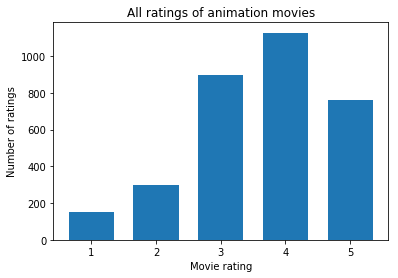

In [28]:
plt.figure()
plt.title("All ratings of animation movies")
plt.xlabel("Movie rating")
plt.ylabel("Number of ratings")
plt.hist(animation_movie_ratings, bins=np.arange(1,7),
         align="left", rwidth=0.7)
plt.show()

# Off the Shelf

In [29]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import BaselineOnly
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [30]:
import pandas as pd

In [31]:
# Pandas Dataframe
ratings_dict = {
    "user_id" : data[:,0],
    "movie_id" : data[:,1],
    "rating" : data[:,2]
}
df = pd.DataFrame(ratings_dict)

# Load the movielens-100k dataset (download it if needed).
reader = Reader(rating_scale=(1, 5))
data_s = Dataset.load_from_df(df[["user_id", "movie_id", "rating"]], reader)
trainset, testset = train_test_split(data_s, test_size=.1)

# Use the famous SVD algorithm.
algo = SVD(n_factors = 20)

algo.fit(trainset)
predictions = algo.test(testset)
print("Surprise SVD Test Set Error:")
error = accuracy.rmse(predictions)**2 

Surprise SVD Test Set Error:
RMSE: 0.9302


In [32]:
Vs = np.transpose(algo.qi)
UsT = algo.pu

In [33]:
print(np.shape(Vs))

(20, 1540)


In [34]:
print(np.shape(UsT))

(943, 20)


# First two collumns projection of U and V

In [35]:
def proj_matrices(UT, V):
    # print(np.shape(UT))
    # print(np.shape(V))
    for i in range(len(V)):
        mean = np.mean(V[i])
        std = np.std(V[i])
        V[i] = (V[i] - mean)/std
        UT[:,i] = (UT[:,i] - mean)/std
    
    A, Sig, BT = np.linalg.svd(V)
    best2A = np.transpose(A[:,:2])
    # print(np.shape(best2A))
    UT_tild = np.transpose(np.dot((best2A), np.transpose(UT)))
    V_tild = np.dot((best2A), V)
    return UT_tild, V_tild

In [36]:
UT_tild, V_tild = proj_matrices(UsT, Vs)

In [37]:
#np.shape(V_2d)

## Visualizations of $\tilde{V}$

### Ten Movies of Our Choice (Star Wars vs Star Trek)

In [38]:
def series_plot(Vtild, series_movies, series_name):

    fig, ax = plt.subplots(figsize=(10,8))
    print(str(len(Vtild[0,series_movies])) + " " + series_name)

    Xs = []
    Ys = []
    titles = []
    colors = []
    for i in range(len(series_movies)):
        idx = series_movies[i]
        x = Vtild[0][idx-1]
        y = Vtild[1][idx-1]
        
        Xs.append(x)
        Ys.append(y)
        titles.append(movies_data[idx][0])  
        colors.append('blue')

    ax.scatter(Xs, Ys, c=colors)
    # ax.set_yscale("symlog")

    for i in range(len(Xs)):
        ax.annotate(titles[i], (Xs[i], Ys[i]), ha="center")

11 Movies with Harrison Ford


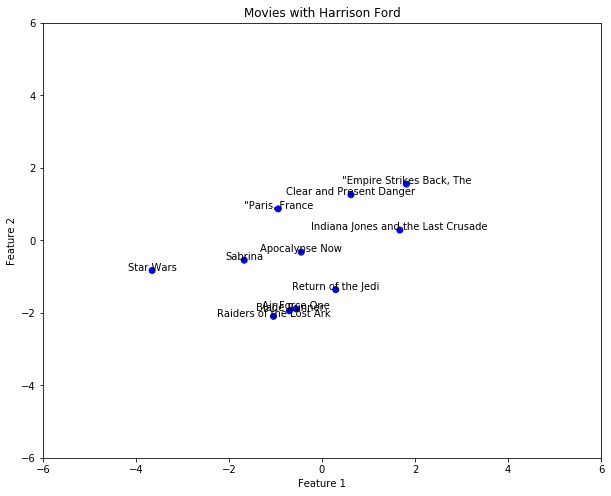

In [47]:
fordMovieInds = [210, 50, 181, 174, 172, 89, 1526, 180, 300, 274, 566]
series_plot(V_tild, fordMovieInds, 'Movies with Harrison Ford')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Movies with Harrison Ford')
plt.savefig('Movies with Harrison Ford.png')

1536 All Movies


Text(0,0.5,'Feature 2')

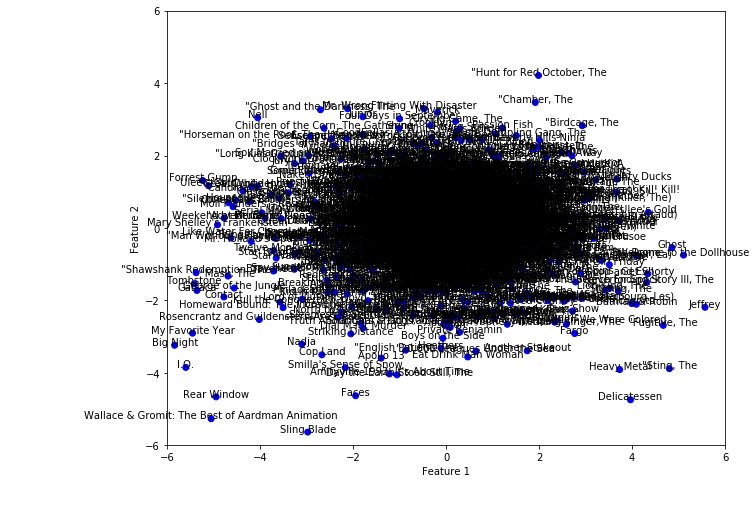

In [40]:
allMovieInds = list(range(1,1537))
series_plot(V_tild, allMovieInds, 'All Movies')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [41]:
#  data(user, movie, rating)

In [42]:
def findUsers(movieIndices, data):
    users_found = []
    answer = []
    for i, triple in enumerate(data):
        user = data[i][0]
        movie_id = data[i][1]
        rating = data[i][2]
        if(movie_id in movieIndices) and user not in users_found:
            users_found.append(user)
            answer.append([user, movie_id, rating])
    return answer

In [43]:
usersWhoRatedHF = findUsers(fordMovieInds, data)
len(usersWhoRatedHF)

850

In [44]:
def series_plot_U(UT_tild, usersInds, series_name):

    fig, ax = plt.subplots(figsize=(10,8))
    #print(str(len(UT_tild[0,series_movies])) + " " + series_name)

    Xs = []
    Ys = []
    titles = []
    colors = []
    for i in range(len(usersInds)):
        idx = usersInds[i][0]
        idx = int(idx)
        x = UT_tild[idx-1][0]
        y = UT_tild[idx-1][1]
        
        Xs.append(x)
        Ys.append(y)
        titles.append(str(i))  
        colors.append('blue')

    ax.scatter(Xs, Ys, c=colors)
    # ax.set_yscale("symlog")

    for i in range(len(Xs)):
        ax.annotate(titles[i], (Xs[i], Ys[i]), ha="center")

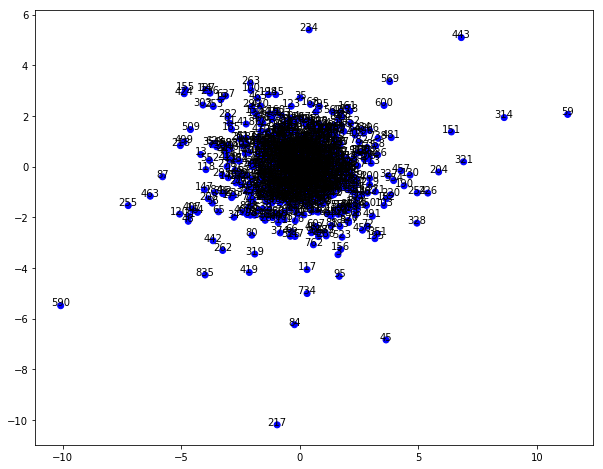

In [45]:
series_plot_U(UT_tild, usersWhoRatedHF, 'Users watched Harrison Ford')